In [11]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('data.csv')
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [13]:
pd.value_counts(df.combined_shot_type)

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

In [14]:
df.columns

Index([u'action_type', u'combined_shot_type', u'game_event_id', u'game_id',
       u'lat', u'loc_x', u'loc_y', u'lon', u'minutes_remaining', u'period',
       u'playoffs', u'season', u'seconds_remaining', u'shot_distance',
       u'shot_made_flag', u'shot_type', u'shot_zone_area', u'shot_zone_basic',
       u'shot_zone_range', u'team_id', u'team_name', u'game_date', u'matchup',
       u'opponent', u'shot_id'],
      dtype='object')

In [15]:
df_no_pre = df[df.shot_made_flag >= 0]
pd.value_counts(df_no_pre.combined_shot_type)

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

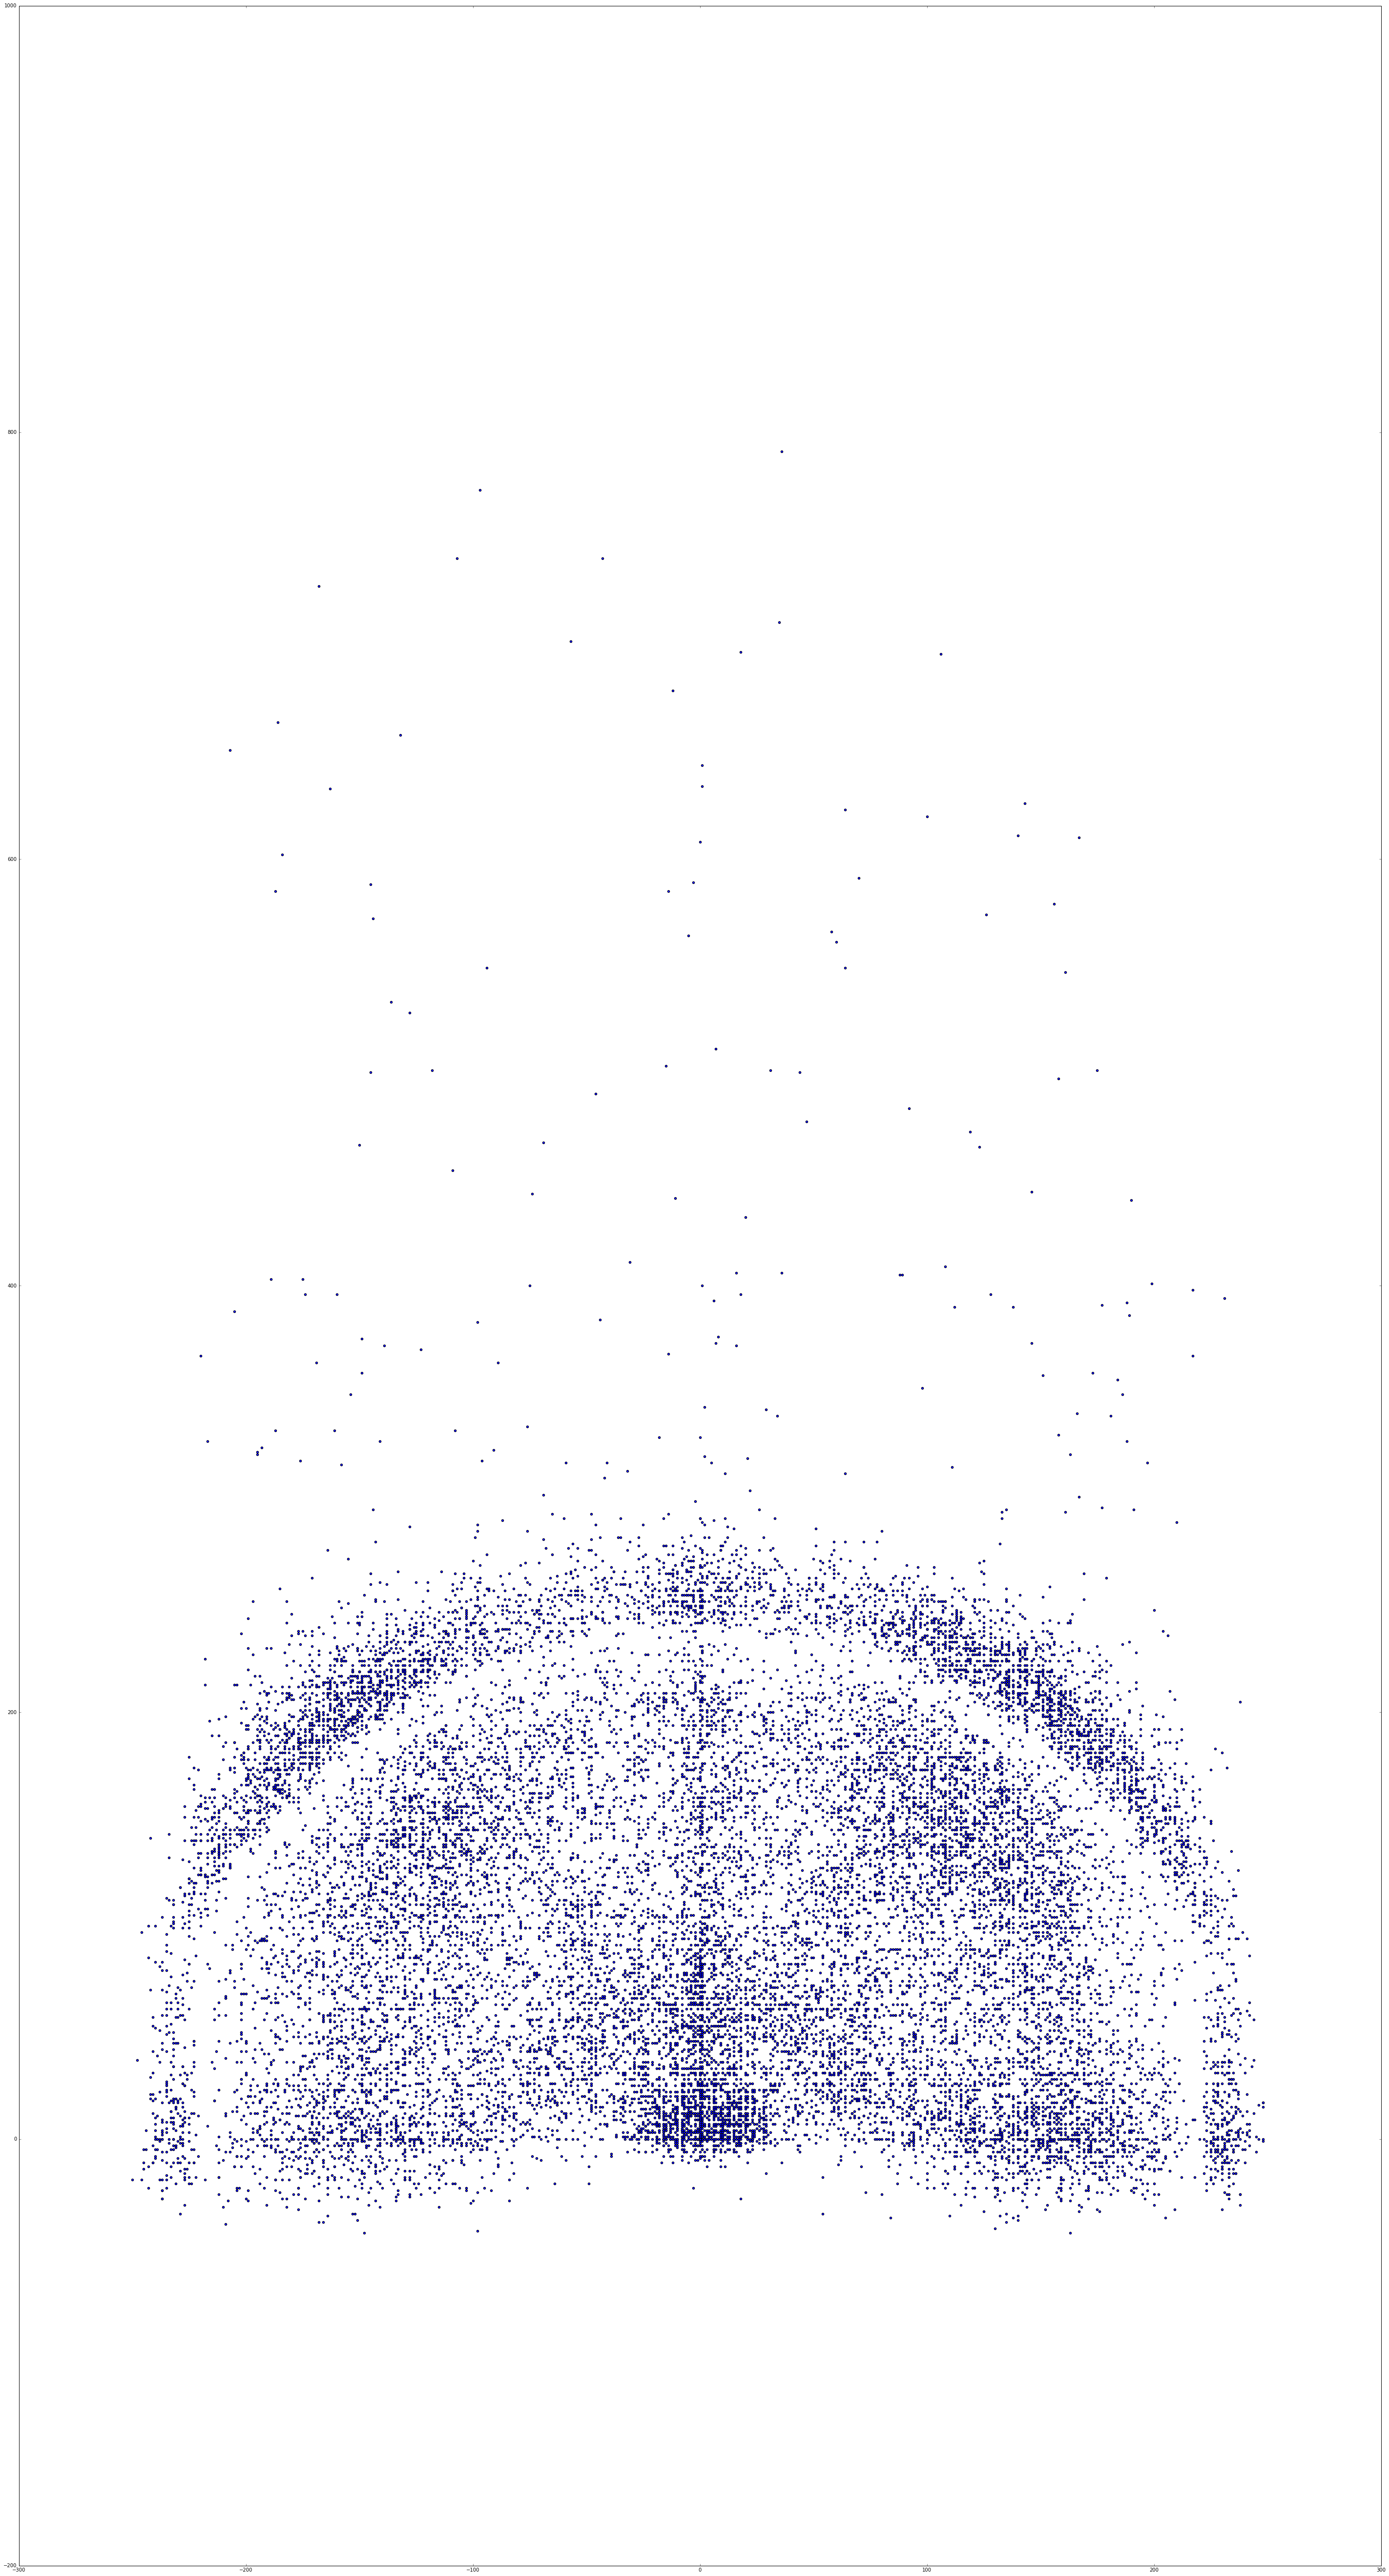

In [19]:
fig = plt.figure(figsize=(50, 94)) 
plt.scatter(df_no_pre[df_no_pre['loc_x'], df_no_pre['loc_y'])

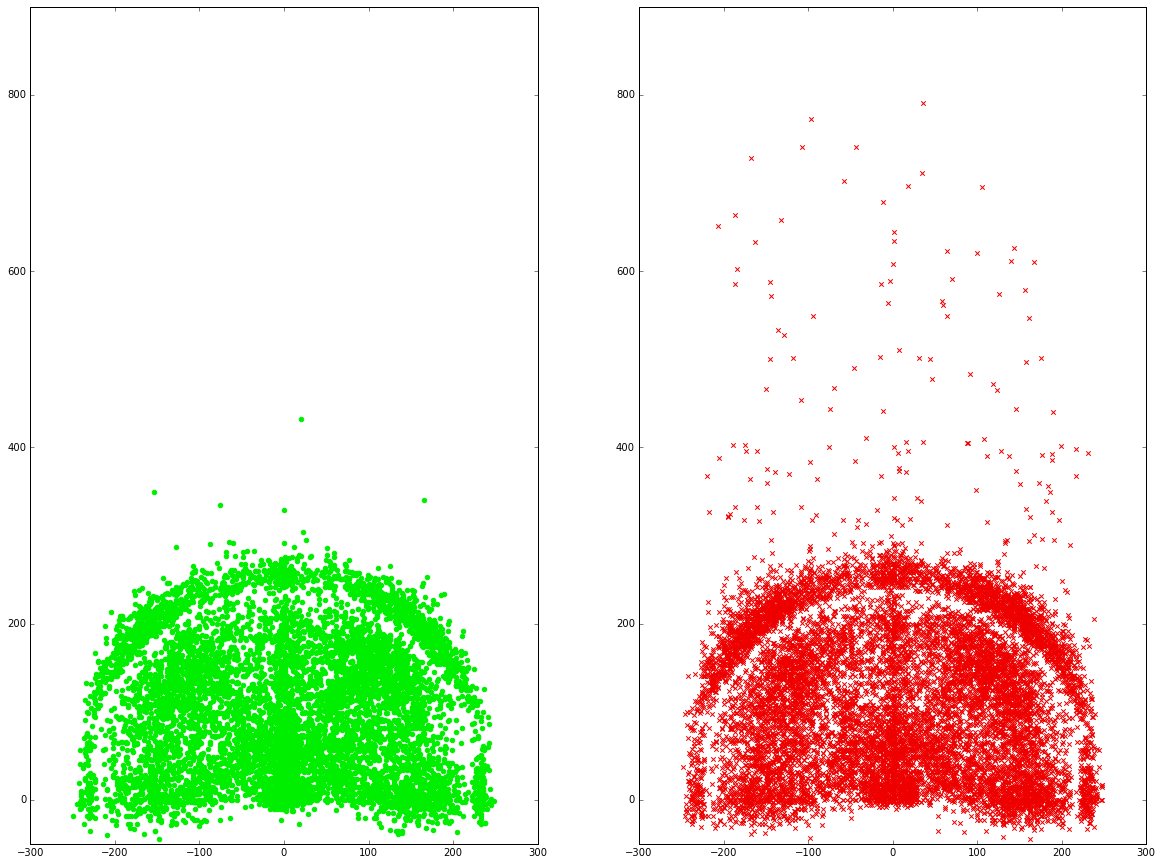

In [49]:
fig2 = plt.figure(figsize=(20, 15)) 
ax1 = fig2.add_subplot(1, 2, 1); ax2 = fig2.add_subplot(1, 2, 2)
df_in = df_no_pre[df_no_pre.shot_made_flag == 1]
df_out = df_no_pre[df_no_pre.shot_made_flag == 0]
ax1.scatter(x=df_in['loc_x'], y=df_in['loc_y'], marker='o', color='#00EE00', label='In')
ax1.set_ylim([-50, 900])
ax2.scatter(x=df_out['loc_x'], y=df_out['loc_y'], marker='x', color='#EE0000', label='Out')
ax2.set_ylim([-50, 900])
fig2.savefig('shot_made_and_missed.png')